# Social Contract in MENAAP

According to the Michael, et, al., 2021 report, there are three aggregate indices to measure the social contract 

1. The Citizen-State Bargain also referred to as 'Civil Capacity'
    - Civil Capacity: Citizen Organization, Citizen Mobilization, Citizen Cooperation
    - State Capacity: State Authority, State Resources, State Efficiency
2. Social Outcomes that form the contents of the social contract
    - Thickness: Public Goods, Social Safety Nets
    - Inclusiveness: Equal Opportunity, Absence of Corruption
    - Responsiveness: Human Right, Freedom of Expression
3. Resilience and Dynamism
    - Alignment: Civil Compliance, Popular Support


## Social Contract Indicators Definitions

| Indicator Code | Indicator Name | Definition |
|---|---|---|
| **Civil_Capacity** | Civil Capacity | The level of voice and collective action capabilities that average citizens have to hold the State accountable and influence public policy. |
| **Absence_Capture** | Lack of elite capture | The level to which bargaining power within the social contract is evenly distributed and not overly concentrated in a narrow group of elites. The extent to which abuse of power is prosecuted. |
| **Absence_Exclusion** | Lack of exclusion | The extent to which there is no marginalization and exclusion of groups based on economic or socio-demographic dimensions where they would be excluded from participating in the social contract. |
| **Social_Capital** | Social capital | The extent to which citizens are knowledgeable about major policy debates and engage in policy discussions among themselves. The amount of interpersonal trust and social cohesion enabling for collective action among groups. |
| **Quality_Interface** | Quality of the Citizen-State Interface | The quality and openness of the channels of communications and exchange between citizens and the State. |
| **Intermediary_Channels** | Institutional channels | Presence of formal access of information institutions (such as open budgeting and open contracting), free and fair elections, and state-led citizen engagement initiatives to consult with citizens. |
| **Institutional_Channels** | Institutional channels | Presence of formal access of information institutions (such as open budgeting and open contracting), free and fair elections, and state-led citizen engagement initiatives to consult with citizens. |
| **Public_Channels** | Public channels | The levels of freedom of expression and of the press that allow for opinions to be shared widely and openly and for public opinion to circulate freely. And freedom of people to assemble into groups to demonstrate. |
| **Resilience** | Resilience | The extent to which there is evidence of a misalignment between citizens' expectations and their perceptions of the outcomes from the social contract, and that there is a way forward for the resolution of these misalignments through peaceful dialogue. |
| **Mass Mobilization** | Social Unrest | The level of presence of mass mobilizations such as protests and demonstrations. |
| **Trust** | Trust in the national government | The self-reported level of trust from citizens in their national government. |
| **Civic_Space** | Perceptions on the quality of the civic space | To what extent are citizens reporting positive perceptions on their freedom of expression, the fairness of elections, and their capacity to voice their opinion to public officials. |

In [494]:
import pandas as pd
import matplotlib.pyplot as plt
from wbpyplot import wb_plot



In [495]:
wb_regions = pd.read_csv('../../MENAAP-Conflict-Analysis/data/worldbank_regions_iso3_exclusions.csv')
wb_regions.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [496]:
countries_of_interest = [
    "Afghanistan","Pakistan","Algeria","Morocco","Libya","Yemen","Iran", "Iraq",
    "Syria","Egypt","Lebanon","Djibouti","United Arab Emirates","Jordan",
    "Oman", "Qatar", "Saudi Arabia", "Kuwait", "Tunisia", "Bahrain", 'Gaza', 'West Bank']

In [497]:
df = pd.read_excel('../data/cloutiapp_data_documentation.xls', engine='xlrd', sheet_name = 'Social Contract Dataset')
df_underlying = pd.read_excel('../data/cloutiapp_data_documentation.xls', engine='xlrd', sheet_name = 'Underlying Data')

In [499]:
df.loc[df['country_name'] == 'Palestine/West Bank', 'country_name'] = 'West Bank'
df.loc[df['country_name'] == 'Palestine/Gaza', 'country_name'] = 'Gaza'

df_underlying.loc[df_underlying['country_name'] == 'Palestine/West Bank', 'country_name'] = 'West Bank'
df_underlying.loc[df_underlying['country_name'] == 'Palestine/Gaza', 'country_name'] = 'Gaza'



In [500]:
df = df.merge(df_underlying[['country_name', 'year','v2cagenmob']].drop_duplicates(), on = ['country_name', 'year'])
df.rename(columns={'v2cagenmob':'Mass Mobilization'}, inplace=True)

In [502]:
df.loc[df['country_name']=='Afghanistan', 'wbregion'] = 'Middle East, North Africa, Afghanistan & Pakistan'

df.loc[df['country_name']=='Pakistan', 'wbregion'] = 'Middle East, North Africa, Afghanistan & Pakistan'
df.replace({'wbregion': {'Middle East & North Africa': 'Middle East, North Africa, Afghanistan & Pakistan'}}, inplace=True)

In [503]:
mena = df[df['country_name'].isin(countries_of_interest)]
df_underlying = df_underlying[df_underlying['country_name'].isin(countries_of_interest)]

print(mena.shape, df_underlying.shape)

(416, 16) (416, 27)


In [504]:
indicators = ['Civil_Capacity', 'Absence_Capture',
       'Absence_Exclusion', 'Social_Capital', 'Quality_Interface',
       'Intermediary_Channels', 'Institutional_Channels', 'Public_Channels',
       'Resilience', 'Mass Mobilization', 'Trust', 'Civic_Space']

In [505]:
regional = df.groupby(['year', 'wbregion'])[indicators].mean().reset_index()

In [506]:
mena_protests = pd.read_csv('../data/conflict/mena_protests.csv')
mena_protests['event_date'] = pd.to_datetime(mena_protests['event_date'])
mena_country_counts = mena_protests.groupby(['country']).size().reset_index()

In [507]:
# Check the structure of mena_country_counts
#print("Top 10 countries by protest count:")
mena_country_counts.columns = ['country', 'protest_count']
mena_country_counts_sorted = mena_country_counts.sort_values('protest_count', ascending=False)
#print(mena_country_counts_sorted.head(10))

In [508]:
world = df.groupby(['year'])[indicators].mean().reset_index()

In [509]:
world['wbregion'] = 'World'
regional = pd.concat([regional, world], ignore_index=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


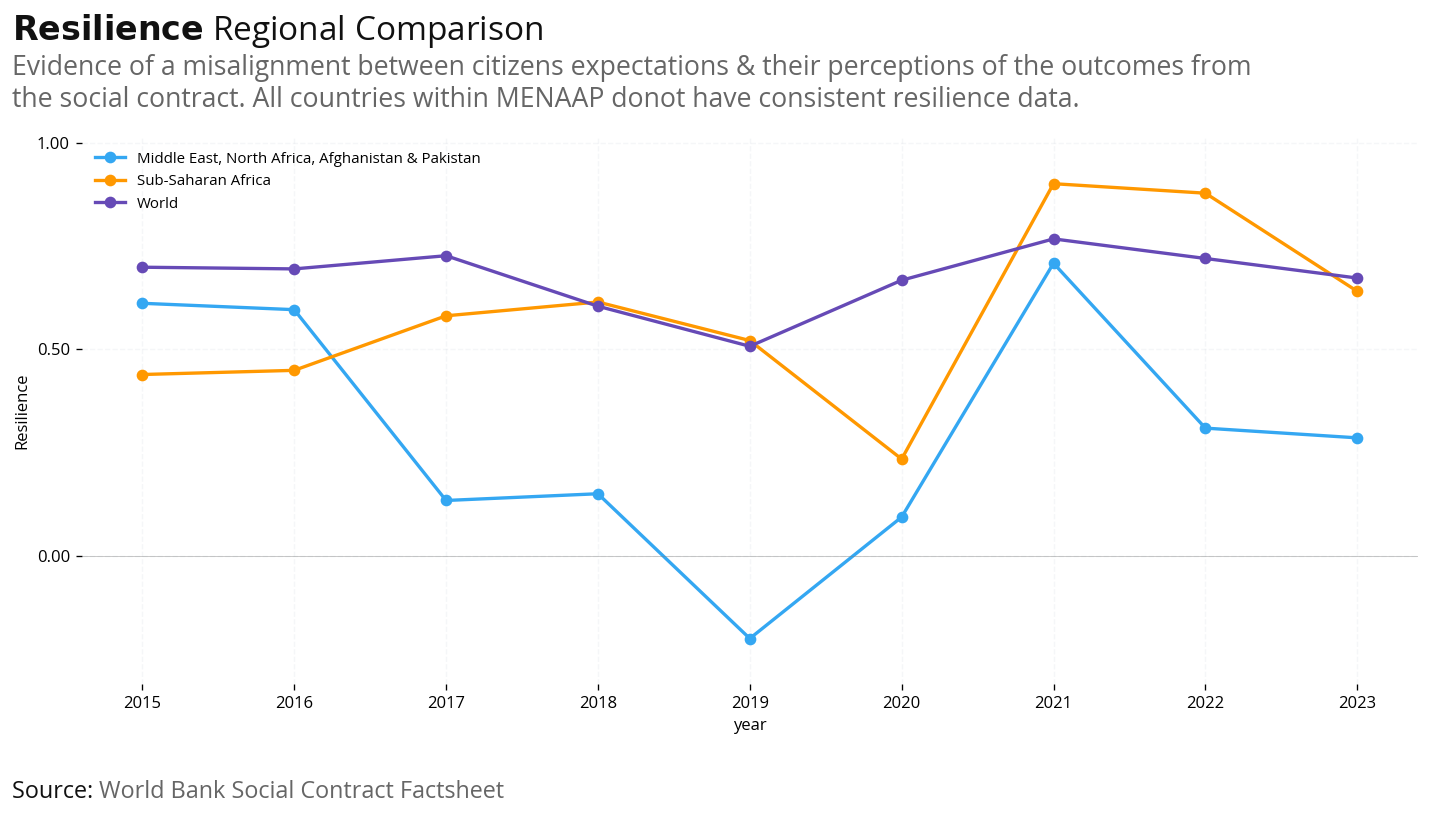

In [535]:
%load_ext autoreload
%autoreload 2


from visuals import *
indicator = 'Resilience'
df = regional[regional['wbregion'].isin(['Middle East, North Africa, Afghanistan & Pakistan', 'World', 'Sub-Saharan Africa'])]
plot_lines_wb(df[df['year']>=2015], line_col = 'wbregion', x_col ='year', 
              value_col = indicator, 
              title = f'{str(indicator)} Regional Comparison',
              subtitle='Evidence of a misalignment between citizens expectations & their perceptions of the outcomes from the social contract. All countries within MENAAP donot have consistent resilience data.')

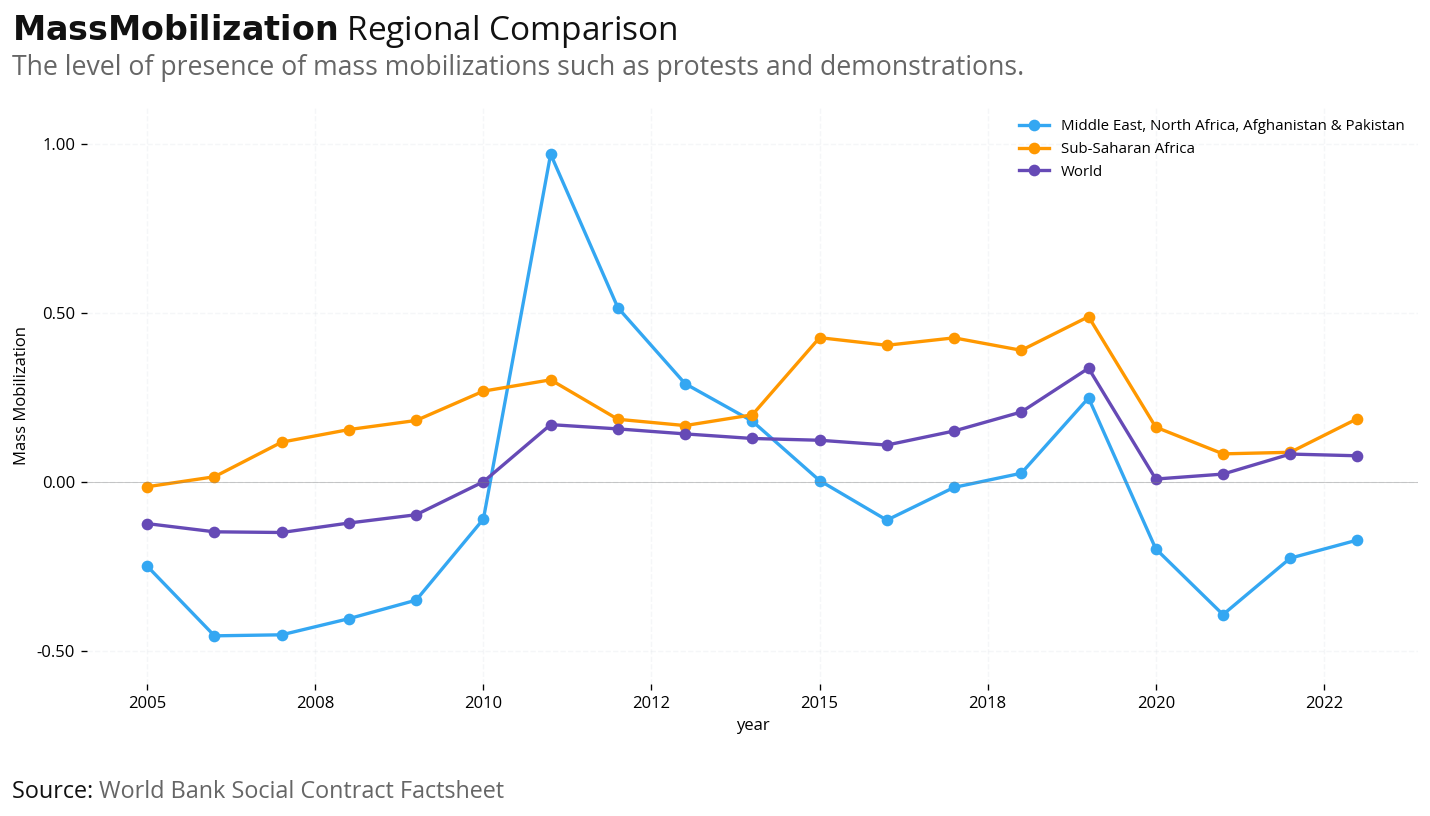

In [511]:
from visuals import *
indicator = 'Mass Mobilization'
df = regional[regional['wbregion'].isin(['Middle East, North Africa, Afghanistan & Pakistan', 'Sub-Saharan Africa', 'World'])]
plot_lines_wb(df[df['year']>=2005], line_col = 'wbregion', x_col ='year', 
              value_col = indicator, 
              title = f'{str(indicator).replace(' ', '')} Regional Comparison',
              subtitle='The level of presence of mass mobilizations such as protests and demonstrations.')

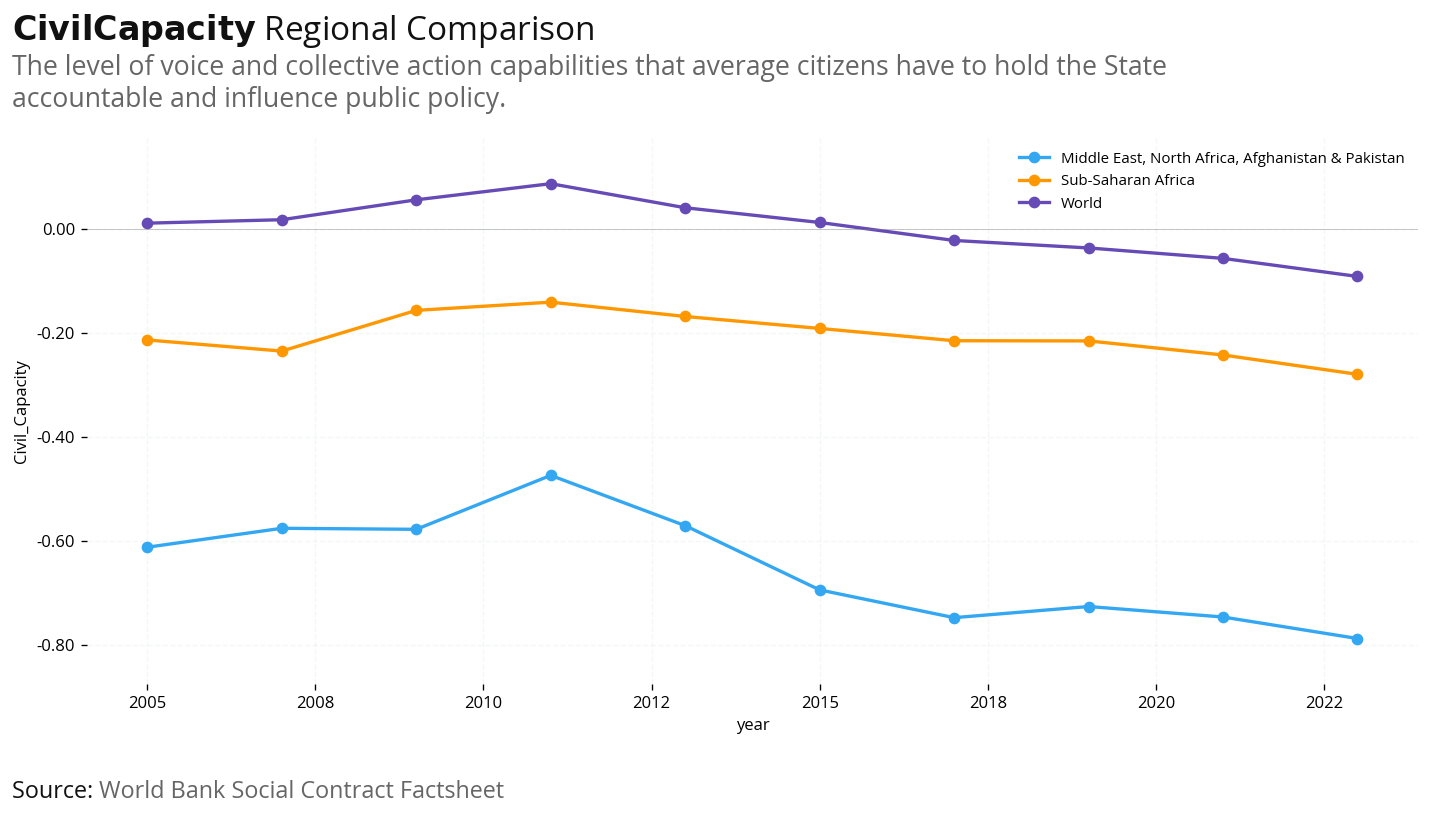

In [512]:
from visuals import *
indicator = 'Civil_Capacity'
df = regional[regional['wbregion'].isin(['Middle East, North Africa, Afghanistan & Pakistan', 'Sub-Saharan Africa', 'World'])]
plot_lines_wb(df[df['year']>=2005], line_col = 'wbregion', x_col ='year', 
              value_col = indicator, 
              title = f'{str(indicator).replace('_', '')} Regional Comparison',
              subtitle='The level of voice and collective action capabilities that average citizens have to hold the State accountable and influence public policy.')

In [513]:
regional_mena = regional[regional['wbregion']=='Middle East, North Africa, Afghanistan & Pakistan']
regional_mena.loc[:, 'country_name'] = 'Middle East, North Africa, Afghanistan & Pakistan'
mena = pd.concat([mena, regional_mena], ignore_index=True)

/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_69171/2507982842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regional_mena.loc[:, 'country_name'] = 'Middle East, North Africa, Afghanistan & Pakistan'


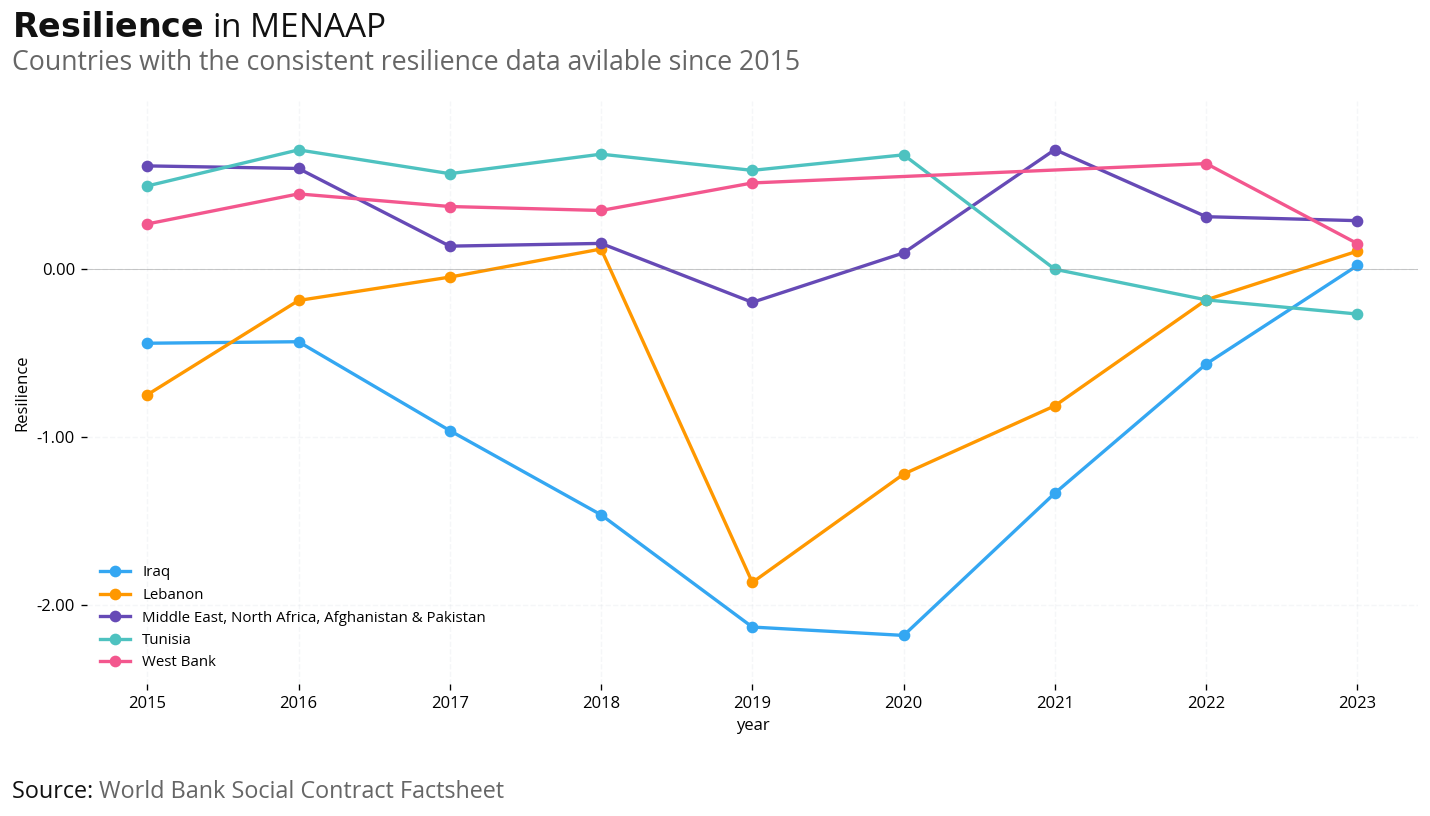

In [532]:
from visuals import *
indicator = 'Resilience'
df = mena[mena['country_name'].isin(['Middle East, North Africa, Afghanistan & Pakistan', 'Morocco', 'Lebanon', 'Iraq', 'Tunisia','West Bank'])]
plot_lines_wb(df[df['year']>=2015], line_col = 'country_name', x_col ='year', 
              value_col = indicator, 
              title = f'{str(indicator).replace(' ', '')} in MENAAP',
              subtitle='Countries with the consistent resilience data avilable since 2015')

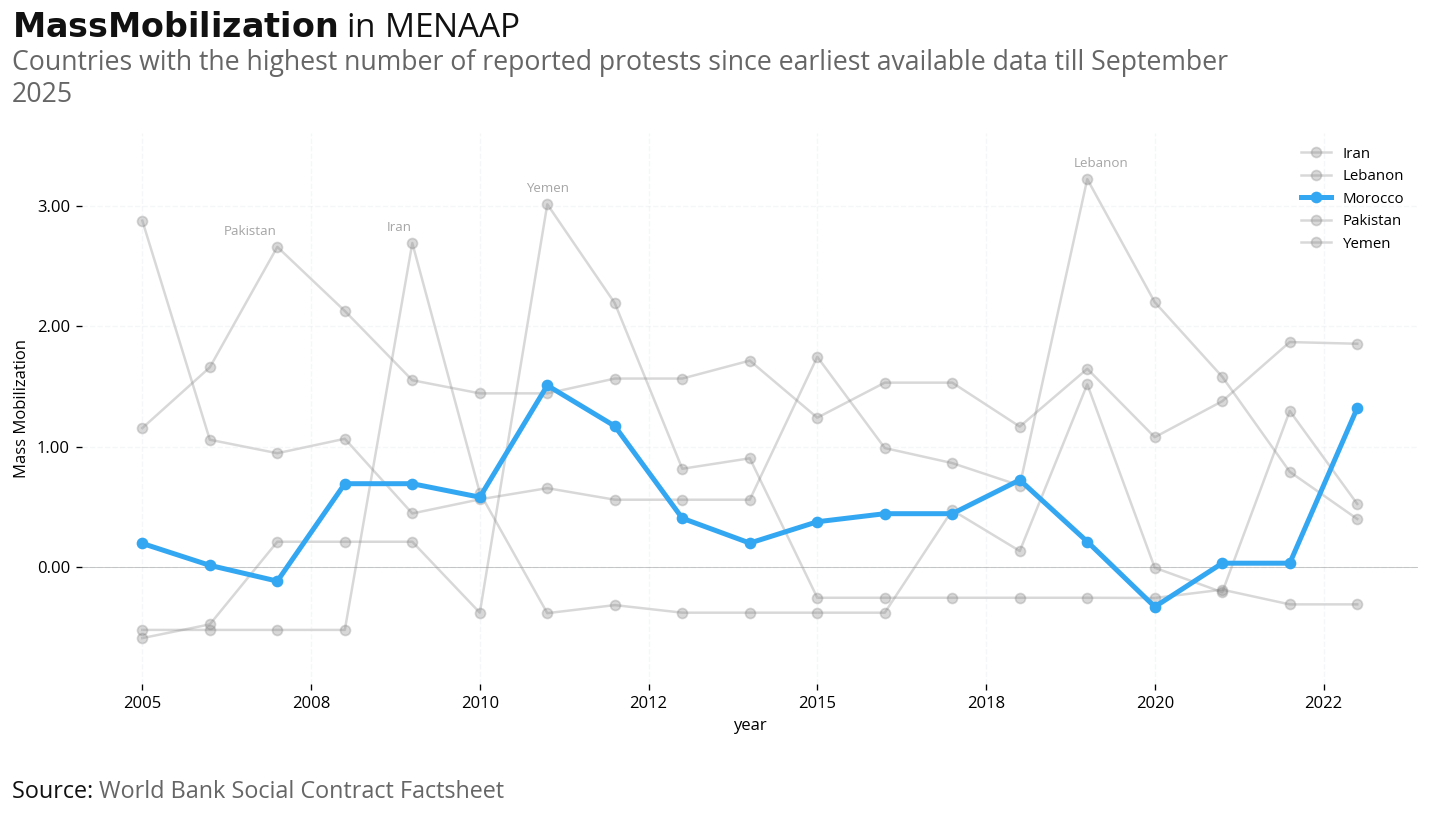

In [515]:
from visuals import *
indicator = 'Mass Mobilization'
df = mena[mena['country_name'].isin(['Morocco', 'Lebanon', 'Iran', 'Pakistan', 'Yemen'])]
plot_lines_wb(df[df['year']>=2005], line_col = 'country_name', x_col ='year', 
              value_col = indicator, 
              title = f'{str(indicator).replace(' ', '')} in MENAAP',highlight_line='Morocco',
              subtitle='Countries with the highest number of reported protests since earliest available data till September 2025')

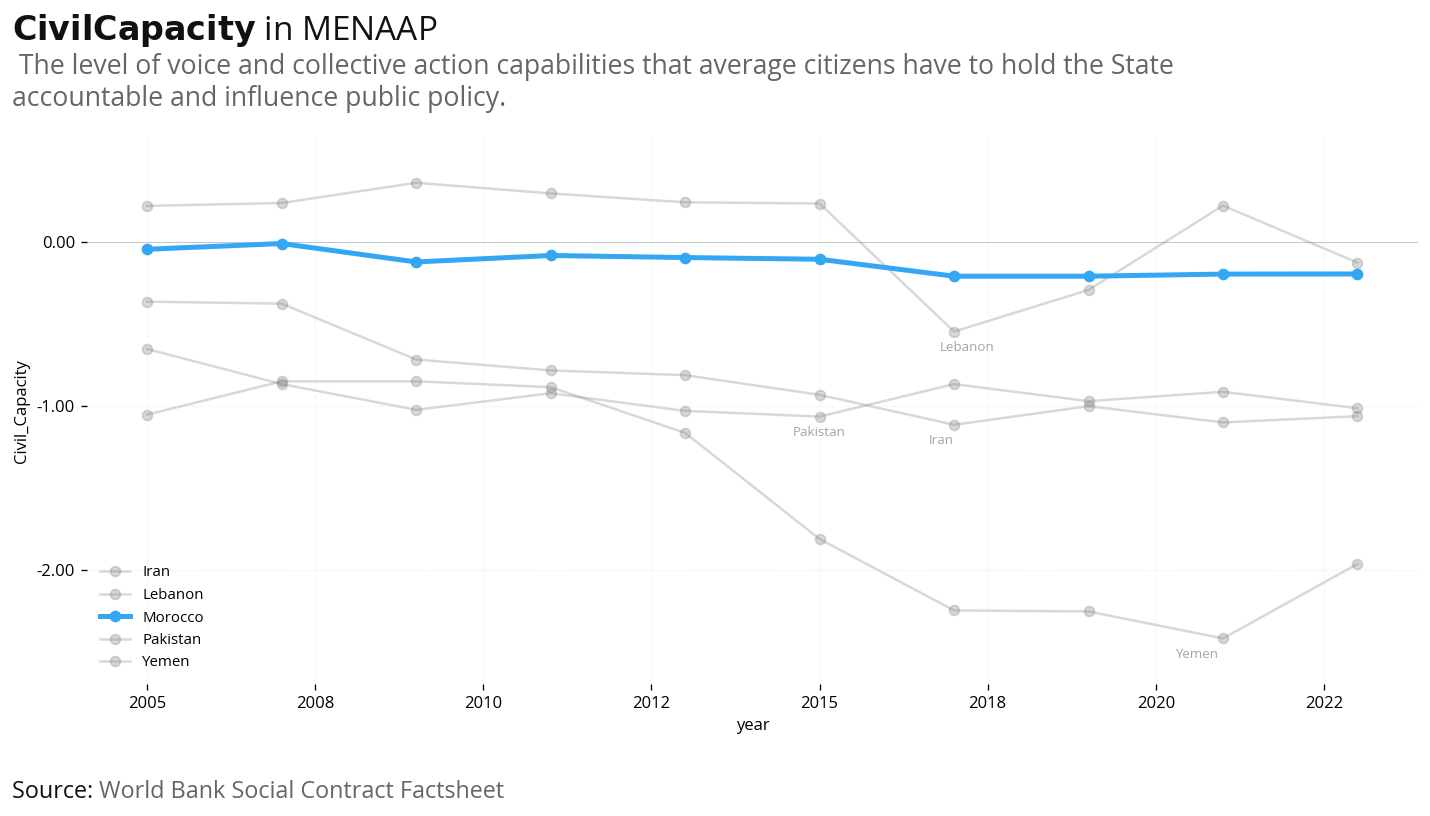

In [516]:
from visuals import *
indicator = 'Civil_Capacity'
df = mena[mena['country_name'].isin(['Morocco', 'Lebanon', 'Iran', 'Pakistan', 'Yemen'])]
plot_lines_wb(df[df['year']>=2005], line_col = 'country_name', x_col ='year', 
              value_col = indicator, 
              title = f'{str(indicator).replace('_', '')} in MENAAP',highlight_line='Morocco',
              subtitle=' The level of voice and collective action capabilities that average citizens have to hold the State accountable and influence public policy.')

In [517]:
morocco = mena[mena['country_name']=='Morocco']
morocco = morocco[['year']+indicators].set_index('year').reset_index().melt(id_vars='year', 
                                                                  value_vars=indicators,
                                                                  var_name='indicator',
                                                                  value_name='value')

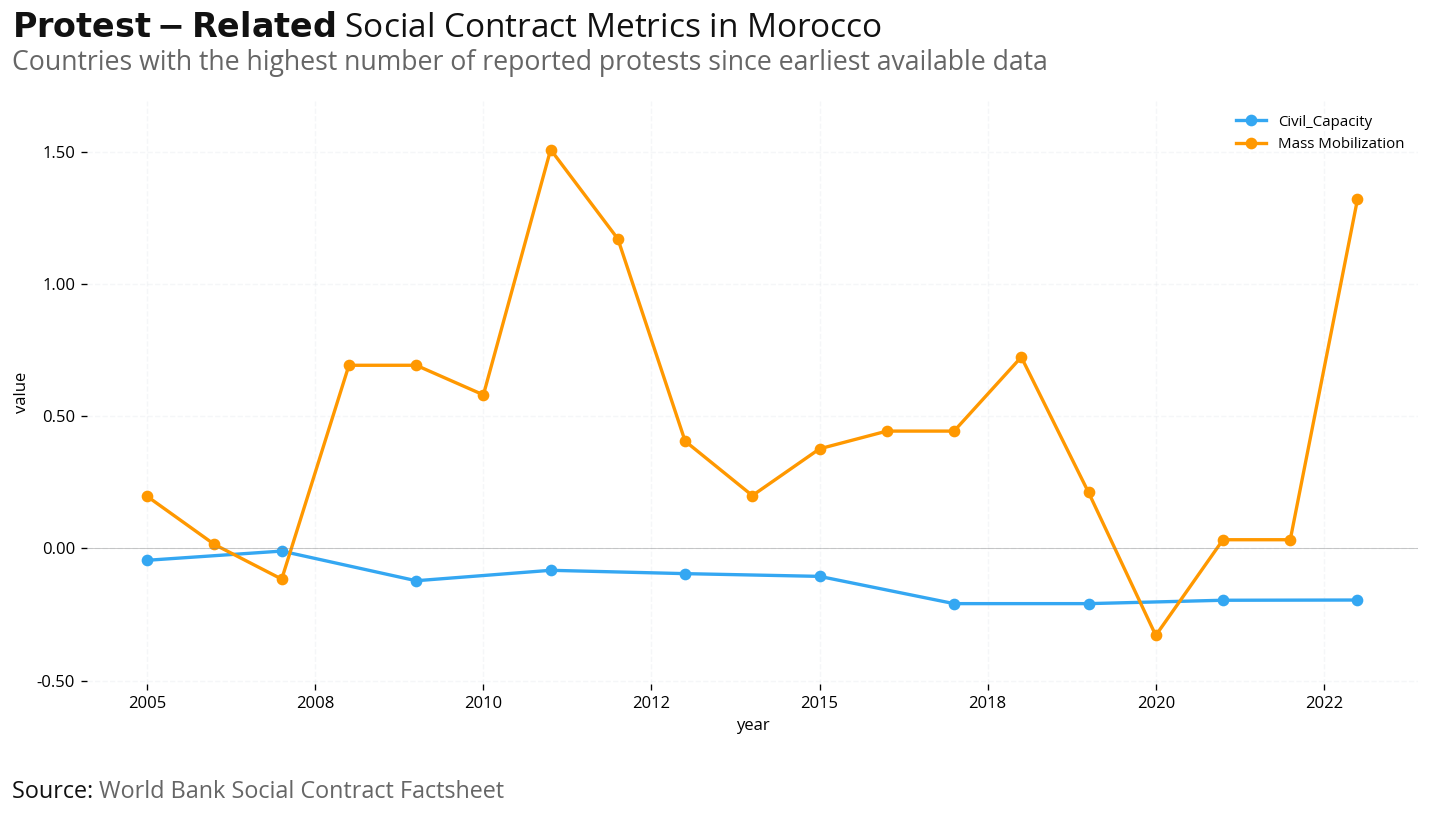

In [518]:
from visuals import *
indicator = 'Mass Mobilization'
df = morocco[morocco['indicator'].isin(['Civil_Capacity', 'Mass Mobilization'])]
plot_lines_wb(df[df['year']>=2005], line_col = 'indicator', x_col ='year', 
              value_col = 'value', 
              title = f'Protest-Related Social Contract Metrics in Morocco',
              subtitle='Countries with the highest number of reported protests since earliest available data')

## Mass Mobilization compared with data from ACLED

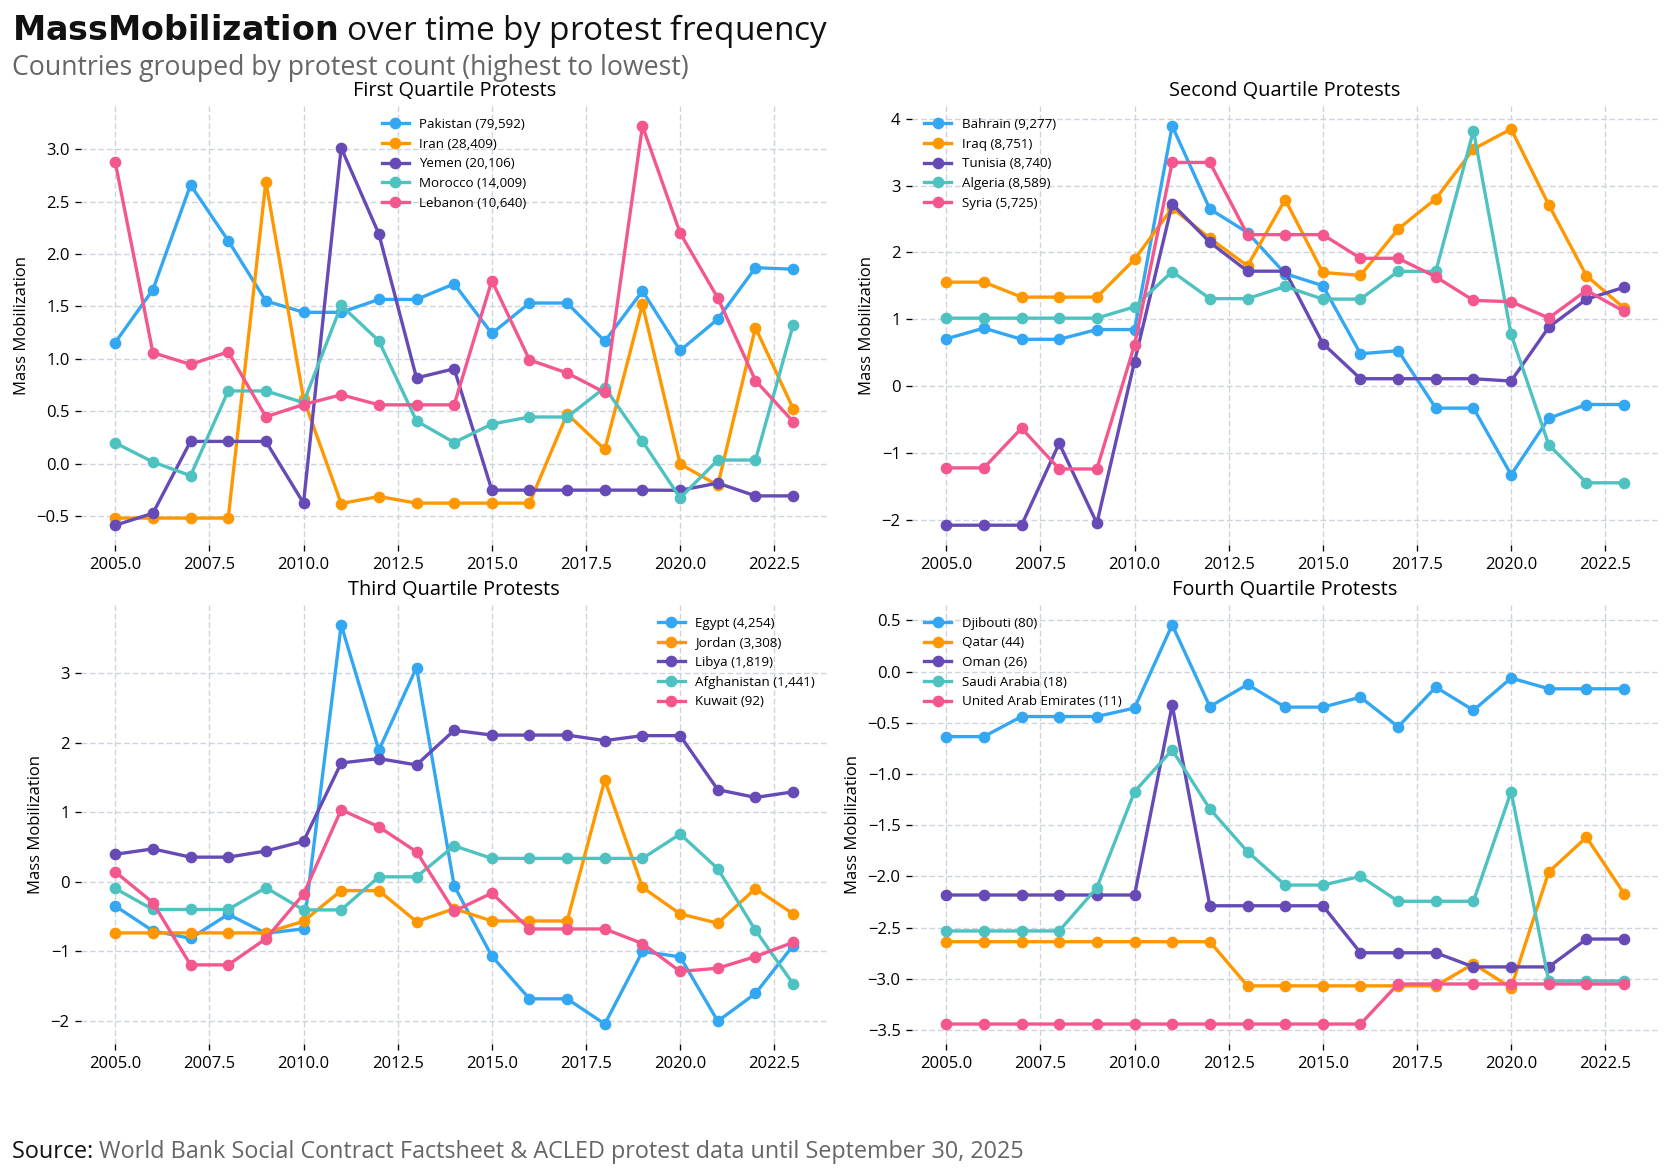

In [519]:
from visuals import *

# Generate four-panel plots for all indicators
for ind in ['Mass Mobilization']:
    plot_indicator_groups_wb(ind, mena, window_n=5, sort_df = mena_country_counts_sorted)

## Clustering Countries by Mass Mobilization Trajectories

We will cluster countries based on their time series patterns for the 'Mass Mobilization' indicator using k-means clustering. The steps are:

1. Pivot the data to get a matrix of countries (rows) x years (columns) for 'Mass Mobilization'.
2. Optionally smooth or interpolate missing values.
3. Standardize the time series for each country.
4. Use k-means clustering to group countries into 3-4 clusters based on their indicator trajectories.
5. Visualize the clusters and their average trajectories.

In [520]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

# 1. Pivot the data: countries as rows, years as columns, values as Mass Mobilization
massmob_pivot = mena.pivot(index='country_name', columns='year', values='Mass Mobilization')

# 2. Interpolate missing values (linear, axis=1)
massmob_pivot_interp = massmob_pivot.interpolate(axis=1, limit_direction='both')

# 3. Standardize each country's time series (z-score across years)
scaler = StandardScaler()
massmob_scaled = scaler.fit_transform(massmob_pivot_interp)

# 4. KMeans clustering (choose 3 or 4 clusters)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(massmob_scaled)

# Add cluster labels to DataFrame
massmob_pivot_interp['cluster'] = labels

# 5. Visualize: Plot average trajectory per cluster
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# for c in range(n_clusters):
#     cluster_mean = massmob_pivot_interp[massmob_pivot_interp['cluster']==c].drop('cluster', axis=1).mean()
#     plt.plot(cluster_mean.index, cluster_mean.values, label=f'Cluster {c+1}', linewidth=3)
# plt.xlabel('Year')
# plt.ylabel('Mass Mobilization (z-score)')
# plt.title('Average Mass Mobilization Trajectory by Cluster')
# plt.legend()
# plt.tight_layout()
# plt.show()

# Optional: Show cluster membership
#display(massmob_pivot_interp[['cluster']])

In [521]:
clusters = massmob_pivot_interp.reset_index()
clusters['cluster'].value_counts()

cluster
3    9
4    5
2    4
0    3
1    2
Name: count, dtype: int64

## Change in Civil Capacity and Mass Mobilization

### Methodology: Calculating Percentage Change with Minimum Data Requirements

Our analysis calculates percentage changes in social contract indicators using a robust methodology that ensures statistical reliability:

#### **Data Quality Threshold**
- **Minimum 10 data points**: Only countries with ≥10 non-null observations per indicator are included
- This threshold ensures we have sufficient temporal coverage to calculate meaningful trends
- Eliminates countries with sparse or insufficient data that could produce misleading results

#### **Calculation Method**
1. **Data Preparation**: Filter out null/missing values for each country-indicator pair
2. **Quality Check**: Verify country has minimum required observations (default: 10 points)
3. **Temporal Sorting**: Arrange data chronologically to identify earliest and latest years
4. **Change Calculation**: 
   ```
   Percentage Change = ((Latest Value - Earliest Value) / |Earliest Value|) × 100
   ```
5. **Transparency**: Include start and end years for each calculation to enable verification


In [522]:
def calculate_multiple_indicators_change(df_data, indicators_list, min_values=10):
    """
    Calculate percentage change for multiple social contract indicators.
    
    This function analyzes time-series data to compute percentage changes between the earliest 
    and latest available data points for each country-indicator combination. Only countries 
    with sufficient data coverage (minimum 10 observations by default) are included to ensure 
    statistical reliability.
    
    Methodology:
    -----------
    1. For each country-indicator pair, filter out null/missing values
    2. Check data sufficiency: country must have ≥ min_values non-null observations
    3. Sort data chronologically and identify earliest/latest available years
    4. Calculate percentage change: ((latest_value - earliest_value) / |earliest_value|) × 100
    5. Return results with start/end years for transparency and verification
    
    Parameters:
    -----------
    df_data : pd.DataFrame
        The social contract dataframe with columns ['country_name', 'year', ...indicators]
    indicators_list : list
        List of indicator column names to analyze
    min_values : int
        Minimum number of non-null values required per country-indicator (default: 10)
        This threshold ensures we have sufficient data points to calculate meaningful trends
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with countries, percentage changes, and start/end years for all indicators.
        Each country uses its own earliest and latest available years based on data availability.
    """
    
    results = []
    
    for indicator in indicators_list:
        if indicator not in df_data.columns:
            continue
            
        # Process each country
        country_changes = []
        
        for country in df_data['country_name'].unique():
            country_data = df_data[df_data['country_name'] == country][['year', indicator]].copy()
            
            # Remove null values
            country_data = country_data.dropna(subset=[indicator])
            
            # Check if country has at least min_values data points
            if len(country_data) < min_values:
                continue
            
            # Sort by year to get earliest and latest
            country_data = country_data.sort_values('year')
            
            # Get earliest and latest values
            earliest_year = country_data['year'].iloc[0]
            latest_year = country_data['year'].iloc[-1]
            earliest_value = country_data[indicator].iloc[0]
            latest_value = country_data[indicator].iloc[-1]
            
            # Calculate percentage change
            if earliest_value != 0:
                pct_change = ((latest_value - earliest_value) / abs(earliest_value)) * 100
            else:
                pct_change = None
            
            # Create indicator name for columns (replace spaces and special chars with underscores)
            indicator_clean = indicator.replace(' ', '_').replace('/', '_').lower()
            
            country_changes.append({
                'country_name': country,
                f'{indicator}_pct_change': pct_change,
                f'{indicator_clean}_start_year': earliest_year,
                f'{indicator_clean}_end_year': latest_year
            })
        
        # Convert to dataframe
        if country_changes:
            change_df = pd.DataFrame(country_changes)
            
            if len(results) == 0:
                results = change_df
            else:
                results = results.merge(change_df, on='country_name', how='outer')
    
    return results

# Calculate percentage changes for key indicators
key_indicators = ['Civil_Capacity', 'Mass Mobilization']  # Focus on key indicators for this analysis
multi_change = calculate_multiple_indicators_change(mena, key_indicators, min_values=10)

print("Columns available in the results:")
print([col for col in multi_change.columns if 'year' in col.lower() or 'pct_change' in col])


Columns available in the results:
['Civil_Capacity_pct_change', 'civil_capacity_start_year', 'civil_capacity_end_year', 'Mass Mobilization_pct_change', 'mass_mobilization_start_year', 'mass_mobilization_end_year']


In [523]:
# Create a prettier version of the multi_change dataframe
def format_multi_change_table(df):
    """
    Format the multi-change dataframe for better presentation
    """
    # Make a copy to avoid modifying the original
    formatted_df = df.copy()
    
    # Round all percentage values to 1 decimal place
    pct_columns = [col for col in formatted_df.columns if 'pct_change' in col]
    for col in pct_columns:
        formatted_df[col] = formatted_df[col].round(1)
    
    # Rename columns for better readability
    column_mapping = {
        'country_name': 'Country',
        'Civil_Capacity_pct_change': 'Civil Capacity (%)',
        'Absence_Capture_pct_change': 'Absence of Capture (%)',
        'Absence_Exclusion_pct_change': 'Absence of Exclusion (%)',
        'Social_Capital_pct_change': 'Social Capital (%)',
        'Quality_Interface_pct_change': 'Quality Interface (%)',
        'Intermediary_Channels_pct_change': 'Intermediary Channels (%)',
        'Institutional_Channels_pct_change': 'Institutional Channels (%)',
        'Public_Channels_pct_change': 'Public Channels (%)',
        'Resilience_pct_change': 'Resilience (%)',
        'Mass Mobilization_pct_change': 'Mass Mobilization (%)',
        'Trust_pct_change': 'Trust (%)',
        'Civic_Space_pct_change': 'Civic Space (%)'
    }
    
    formatted_df = formatted_df.rename(columns=column_mapping)
    
    # Custom sorting: MENAAP region first, then by Mass Mobilization change
    if 'Mass Mobilization (%)' in formatted_df.columns:
        # Separate MENAAP region and other countries
        menaap_mask = formatted_df['Country'] == 'Middle East, North Africa, Afghanistan & Pakistan'
        menaap_rows = formatted_df[menaap_mask]
        other_rows = formatted_df[~menaap_mask]
        
        # Sort other countries by Mass Mobilization in descending order
        other_rows_sorted = other_rows.sort_values('Mass Mobilization (%)', ascending=False, na_position='last')
        
        # Concatenate: MENAAP first, then sorted countries
        formatted_df = pd.concat([menaap_rows, other_rows_sorted], ignore_index=True)
    
    return formatted_df

# Apply formatting
multi_change = multi_change[['country_name', 'Civil_Capacity_pct_change', 'Mass Mobilization_pct_change']]
pretty_multi_change = format_multi_change_table(multi_change)


In [533]:
# Create a styled pandas dataframe for better visual presentation
def create_styled_multi_change():
    """
    Create a beautifully styled version of the multi_change dataframe
    """
    styled_df = pretty_multi_change.copy()
    
    # Identify countries with missing data for Civil Capacity and Mass Mobilization
    civil_capacity_missing = []
    mass_mobilization_missing = []
    
    # Countries completely missing from results (insufficient data points)
    countries_no_data = []#original_countries - countries_with_data
    
    # Check for missing values in specific indicators among countries that have some data
    for _, row in multi_change.iterrows():
        if pd.isna(row['Civil_Capacity_pct_change']):
            civil_capacity_missing.append(row['country_name'])
            #print(row['country_name'])
        if pd.isna(row['Mass Mobilization_pct_change']):
            mass_mobilization_missing.append(row['country_name'])
            #print(row['country_name'])

    # Add countries with no data at all to both lists
    civil_capacity_missing.extend(list(countries_no_data))
    mass_mobilization_missing.extend(list(countries_no_data))
    
    # Create subtitle text
    subtitle_parts = []
    if civil_capacity_missing:
        civil_missing_str = ", ".join(sorted(civil_capacity_missing))
        subtitle_parts.append(f"Civil Capacity data unavailable for: {civil_missing_str}")
        #print(civil_missing_str)
    
    if mass_mobilization_missing:
        mass_missing_str = ", ".join(sorted(mass_mobilization_missing))
        subtitle_parts.append(f"Mass Mobilization data unavailable for: {mass_missing_str}")
    
    subtitle = " | ".join(subtitle_parts) if subtitle_parts else "Complete data available for all countries"
    
    # Define a color mapping function for percentage changes
    def color_percentage(val):
        if pd.isna(val):
            return 'color: gray'
        elif val > 50:
            return 'color: red; font-weight: bold'
        elif val > 0:
            return 'color: green'
        elif val > -20:
            return 'color: orange'
        else:
            return 'color: red'
    
    # Apply styling
    styled = styled_df.style.format({
        col: '{:.1f}%' for col in styled_df.columns if col != 'Country'
    }).map(color_percentage, subset=[col for col in styled_df.columns if col != 'Country'])\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('margin-bottom', '10px')]},
    ])\
    .set_caption(f"Social Contract Indicators: Percentage Change (2005-2023)<br><small style='font-size: 12px; color: #666; font-weight: normal;'>Analysis includes countries with at least 10 years of data available<br>{subtitle}</small>")\
    .hide(axis='index')
    
    return styled

# Display the styled dataframe
styled_table = create_styled_multi_change()
styled_table

Country,Civil Capacity (%),Mass Mobilization (%)
"Middle East, North Africa, Afghanistan & Pakistan",-28.7%,31.1%
Morocco,-336.0%,570.6%
Libya,-56.5%,229.1%
Iran,-191.7%,200.8%
Syria,-66.9%,191.3%
Tunisia,576.9%,171.0%
Djibouti,nan%,73.7%
Pakistan,-55.3%,60.6%
Yemen,-86.5%,47.5%
Jordan,-20.3%,37.2%
